In [394]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Task - 2

1)Plot surfaces with dataset sizes (50, 200, 500) and model complexities (2,3,6) with different values of lambda.

2)Scatter plots with target output 𝑡𝑛 on x-axis and model output (𝒙𝑛 , 𝒘) on yaxis for the best performing model, for training data and test data

3)Tables showing the 𝐸𝑅𝑀𝑆 on the training data, the validation data and the test data, for different models




Index of Functions:

- get_feature_mat(x1,x2,deg): return mat 
- get_weights(feature,y): return mat
- get_regularised_weights(feature,y,lamb): return mat
- get_sample_data(df,size): return x1, x2, y
- linear_regress_poly_basis(x1,x2,y,deg): return w_star
- linear_regress_poly_basis_with_regu(x1,x2,y,deg,lamb): return w_star
- predict(x1, x2, w, deg): return y
- plot_predict_v_actual(weight,X1,X2,Y,deg): plots graph
- train_val_test_split(df): return train, val, test
- e_rms(weight, train, test, val, deg): return e_train, e_val, e_test

In [395]:
df = pd.read_csv('function0_2d.csv')
df.head()

,Unnamed: 0,x1,x2,y
0,0,-1.780329,1.833831,7.371565
1,1,-14.448144,13.645452,21.055938
2,2,-5.206188,11.865557,17.921304
3,3,5.885330,11.831869,17.770090
4,4,-4.949820,-12.690380,18.465143


In [396]:
df.describe()

,Unnamed: 0,x1,x2,y
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,-0.254923,0.189507,17.102267
std,577.494589,9.195691,9.181824,3.338352
min,0.000000,-15.998309,-15.985441,3.170340
25%,499.750000,-8.114449,-7.579640,15.794764
50%,999.500000,-0.523056,0.062459,18.179844
75%,1499.250000,7.454075,8.210805,19.444185
max,1999.000000,15.980312,15.995282,21.348342


Dataset has 2 input features - x1 and x2

and 1 output variable - y

x1 and x2 lies between (-16,16)

y lies between (3,22)

In [397]:
x1 = np.array(df.x1)
x2 = np.array(df.x2)
y = np.array(df.y)
print(x1)

[ -1.78032948 -14.44814428  -5.20618838 ... -11.19534009  15.9202973
   1.30476708]


<IPython.core.display.Javascript object>


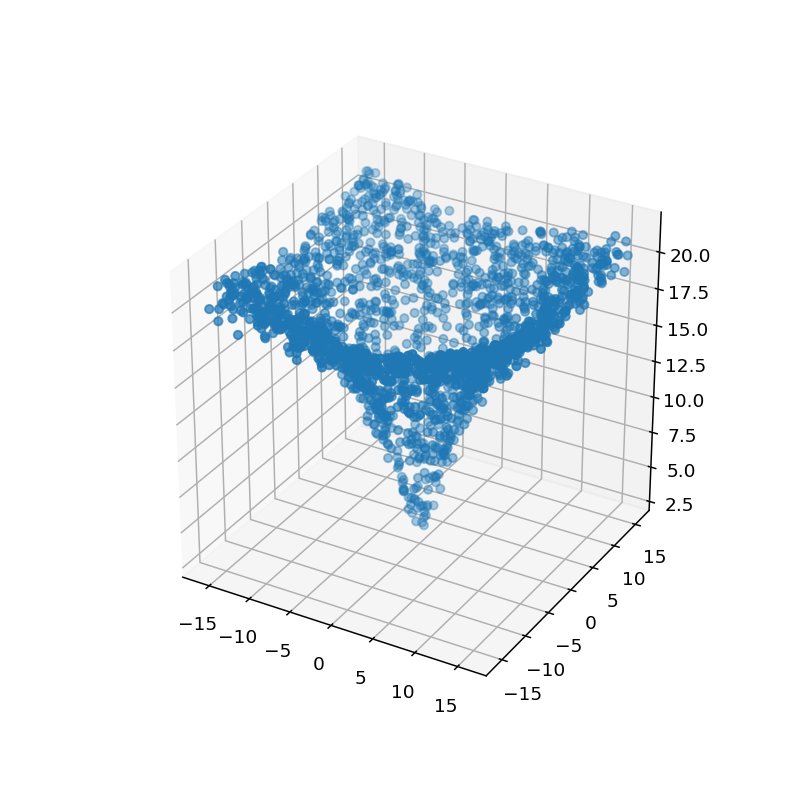

In [398]:
# %matplotlib notebook

fig= plt.figure(figsize = (6,6))

ax = fig.add_subplot(111, projection = '3d')

ax.xlabel = 'X1'
ax.yabel = 'X2'
ax.zlabel = 'Y'

ax.scatter(x1,x2,y)

In [399]:
def get_feature_mat(x1,x2,deg):
    
    d = deg
    
    mat = []
    
    for a,b in zip(x1,x2):
        
#         d = deg
        arr = [(a**i)*(b**(j)) for i in range(d+1) for j in range(d-i+1)]
        
        mat.append(arr)
        
    return mat 

In [400]:
print(get_feature_mat([1,2],[1,2],4))

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 4, 8, 16, 2, 4, 8, 16, 4, 8, 16, 8, 16, 16]]


In [401]:
def get_weights(feature,y):
    
    return np.dot(np.linalg.pinv(feature),y)

In [451]:
def get_regularised_weights(feature,y,lamb):
    
    fTf = np.dot(feature.T,feature)
    n = fTf.shape[0]
#     fTf /= n
    b = np.linalg.inv(fTf + lamb*np.identity(n))
    
    return np.dot(np.dot(b,feature.T),y)

In [403]:
def get_sample_data(df,size):
    
    sam = df.sample(n = size, random_state = 1)
    x1 = np.array(sam['x1'])
    x2 = np.array(sam['x2'])
    y = np.array(sam['y'])
    
    return x1, x2, y

In [404]:
def linear_regress_poly_basis(x1,x2,y,deg):
    
#     x,y = get_sample_data(df,sample_size)
    
    features = get_feature_mat(x1,x2,deg)
    
    w_star = get_weights(features,y)
    
    return w_star

In [452]:
def linear_regress_poly_basis_with_regu(x1,x2,y,deg,lamb):
    
    features = np.array(get_feature_mat(x1,x2,deg))
    
    w_star = get_regularised_weights(features,y,lamb)
    
    return w_star

In [453]:
print(linear_regress_poly_basis_with_regu(x1,x2,y,6,np.exp(-10)))

[ 8.72464863e+00 -1.82373543e-02  1.16613128e-01  3.33409224e-04
 -4.72573859e-04 -1.24228532e-06  7.06010537e-07  7.08662559e-03
 -4.24444043e-03 -4.81251047e-06  5.03513672e-05  1.96939168e-07
 -9.20391071e-08  1.16856163e-01  2.50850383e-04 -6.79955709e-04
 -5.70067295e-07  1.17374575e-06 -2.46267143e-04  2.25085957e-05
 -4.30384543e-07 -2.41732569e-07 -4.82751376e-04 -9.50495699e-07
  1.07952783e-06  1.03579102e-06  1.71911783e-08  7.63320377e-07]


In [406]:
def predict(x1, x2, w, deg):
    
    a,b = x1, x2
    d = deg
    f = [(a**i)*(b**(j)) for i in range(d+1) for j in range(d-i+1)]
    
    return np.dot(f,w)

In [407]:
def e_rms(weight, train, test, val, deg):
    
    x1_train, x2_train, y_train = map(np.array,[train.x1, train.x2, train.y])
    x1_val, x2_val, y_val = map(np.array,[val.x1, val.x2, val.y])
    x1_test, x2_test, y_test = map(np.array,[test.x1, test.x2, test.y])
    
    t_train =  np.array([predict(a,b,weight,deg) for a,b in zip(x1_train,x2_train)])
    t_val =  np.array([predict(a,b,weight,deg) for a,b in zip(x1_val,x2_val)])
    t_test =  np.array([predict(a,b,weight,deg) for a,b in zip(x1_test,x2_test)])
 
    e_train = 1/len(train)*(np.sum((t_train - y_train)**2))**0.5
    e_val = 1/len(val)*(np.sum((t_val - y_val)**2))**0.5
    e_test = 1/len(test)*((np.sum(t_test - y_test)**2))**0.5
    
    return e_train, e_val, e_test

In [408]:
size = 50
X1, X2, Y = get_sample_data(df,size)

In [409]:
x1_axis = np.linspace(-15,15,100)
x2_axis = np.linspace(-15,15,100)

# W8 = linear_regress_poly_basis(X1,X2,Y,8)
# f8 = get_feature_mat(x1_axis,x2_axis,1)

W2 = linear_regress_poly_basis(X1,X2,Y,2)
# f2 = get_feature_mat(x1_axis,x2_axis,2)

W3 = linear_regress_poly_basis(X1,X2,Y,3)
# f3 = get_feature_mat(x1_axis,x2_axis,3)

# W4 = linear_regress_poly_basis(X1,X2,Y,4)
# f4 = get_feature_mat(x1_axis,x2_axis,4)

W6 = linear_regress_poly_basis(X1,X2,Y,6)
# f6 = get_feature_mat(x1_axis,x2_axis,6)

In [410]:
newX1 = []
for x1 in x1_axis:
    newX1 = newX1 + [x1]*100

newX1 = np.array(newX1)
l = list(x2_axis)
newX2 = np.array(l*100)

z2 = np.array([predict(x1,x2,W2,2) for x1,x2 in zip(newX1,newX2)])
z3 = np.array([predict(x1,x2,W3,3) for x1,x2 in zip(newX1,newX2)])
z6 = np.array([predict(x1,x2,W6,6) for x1,x2 in zip(newX1,newX2)])

<IPython.core.display.Javascript object>


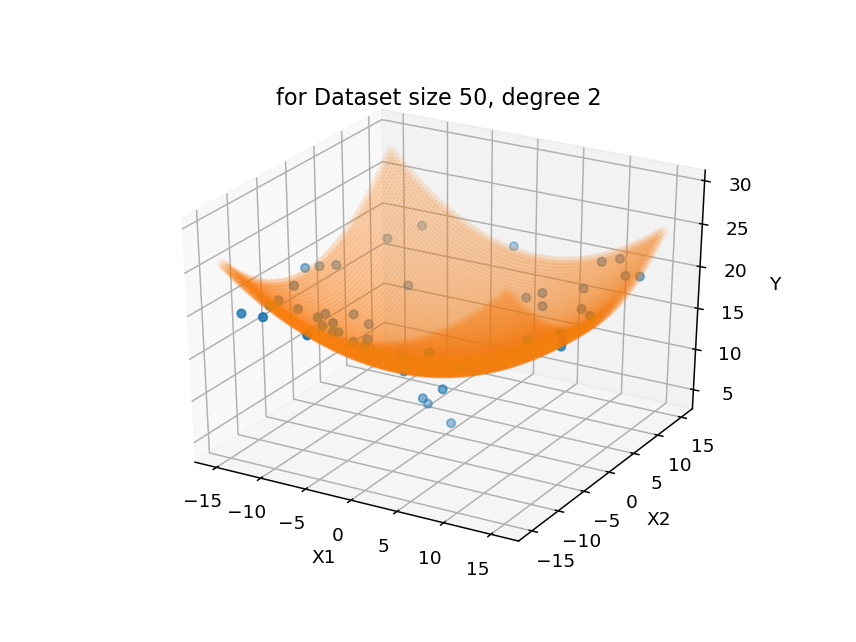

In [411]:
fig = plt.figure()

# For W2
ax = fig.add_subplot(111, projection = '3d')

ax.set_title('for Dataset size 50, degree 2')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")

ax.scatter(X1, X2, Y) # actual data points 

ax.scatter(newX1, newX2, z2, alpha = 0.05)

plt.show()


# print(f'x1 - {newX1.shape}, x2 - {newX2.shape}, z - {z.shape}')


<IPython.core.display.Javascript object>


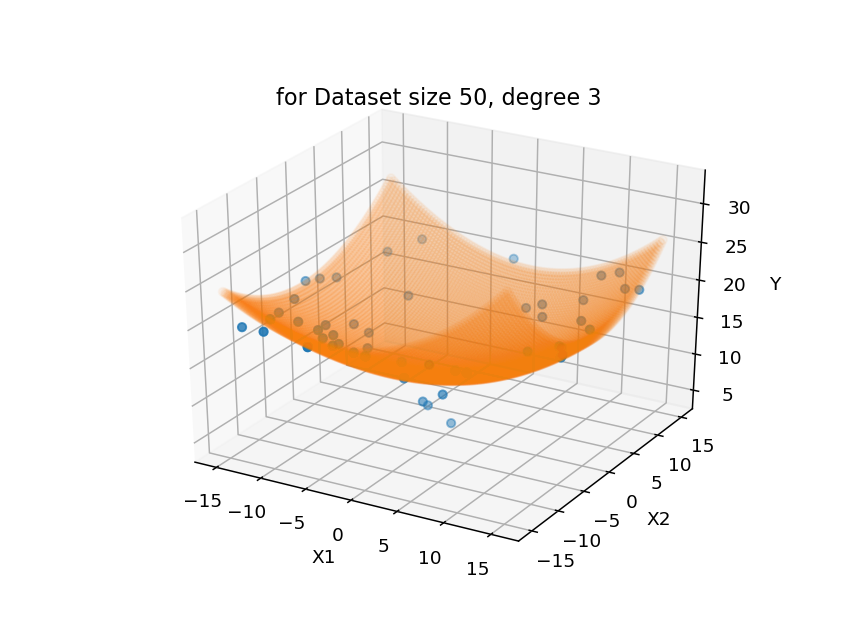

In [412]:
fig = plt.figure()
ax3 = fig.add_subplot(111, projection = '3d')

ax3.set_title('for Dataset size 50, degree 3')
ax3.set_xlabel("X1")
ax3.set_ylabel("X2")
ax3.set_zlabel("Y")

ax3.scatter(X1, X2, Y) # actual data points 
ax3.scatter(newX1, newX2, z3, alpha = 0.05)


<IPython.core.display.Javascript object>


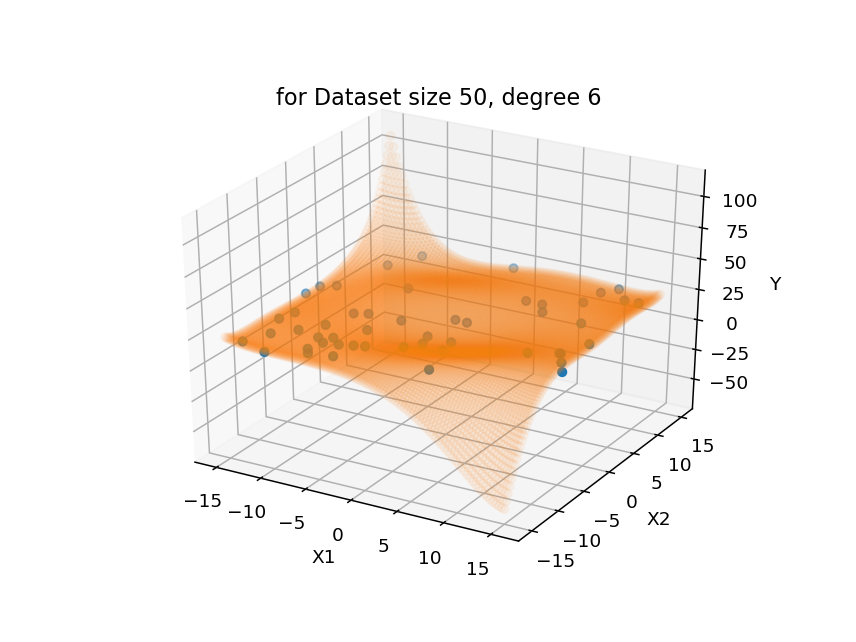

In [413]:
fig = plt.figure()
# for W6
ax6 = fig.add_subplot(111, projection = '3d')

ax6.set_title('for Dataset size 50, degree 6')
ax6.set_xlabel("X1")
ax6.set_ylabel("X2")
ax6.set_zlabel("Y")

ax6.scatter(X1, X2, Y) # actual data points 
ax6.scatter(newX1, newX2, z6, alpha = 0.05)


<IPython.core.display.Javascript object>


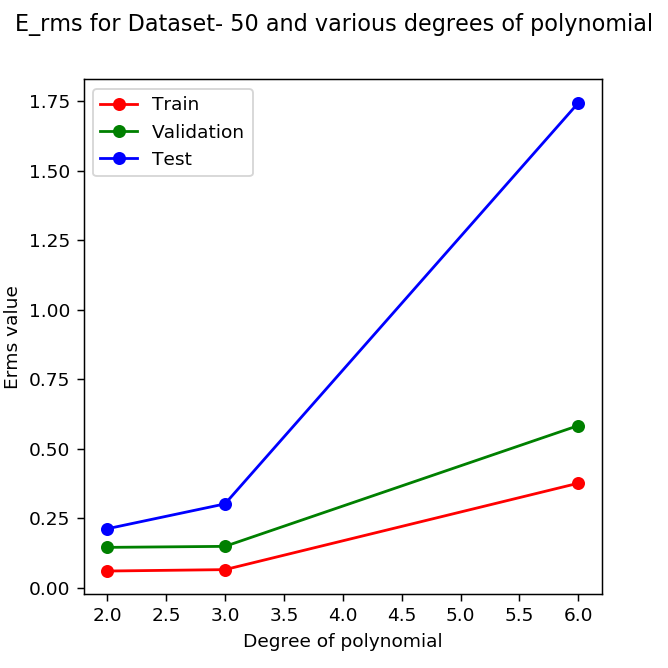

In [414]:
fig = plt.figure(figsize = (5,5))
fig.suptitle('E_rms for Dataset- 50 and various degrees of polynomial')

e_train2, e_val2, e_test2 = e_rms(W2,train,val,test,2)
e_train3, e_val3, e_test3 = e_rms(W3,train,val,test,3)
e_train6, e_val6, e_test6 = e_rms(W6,train,val,test,6)

ax = fig.add_subplot(111)

# print([e_train2,e_train3,e_train6])
ax.plot([2,3,6],[e_train2,e_train3,e_train6],'o-r',label = 'Train')
ax.plot([2,3,6],[e_val2,e_val3,e_val6],'o-g', label = 'Validation')
ax.plot([2,3,6],[e_test2,e_test3,e_test6],'o-b', label = 'Test')
ax.set_xlabel('Degree of polynomial')
ax.set_ylabel('Erms value')

plt.legend()

In [415]:
size = 200
X1, X2, Y = get_sample_data(df,size)

In [416]:
W2 = linear_regress_poly_basis(X1,X2,Y,2)
# f2 = get_feature_mat(x1_axis,x2_axis,2)

W3 = linear_regress_poly_basis(X1,X2,Y,3)
# f3 = get_feature_mat(x1_axis,x2_axis,3)

# W4 = linear_regress_poly_basis(X1,X2,Y,4)
# f4 = get_feature_mat(x1_axis,x2_axis,4)

W6 = linear_regress_poly_basis(X1,X2,Y,6)
# f6 = get_feature_mat(x1_axis,x2_axis,6)

In [417]:
z2 = np.array([predict(x1,x2,W2,2) for x1,x2 in zip(newX1,newX2)])
z3 = np.array([predict(x1,x2,W3,3) for x1,x2 in zip(newX1,newX2)])
z6 = np.array([predict(x1,x2,W6,6) for x1,x2 in zip(newX1,newX2)])

<IPython.core.display.Javascript object>


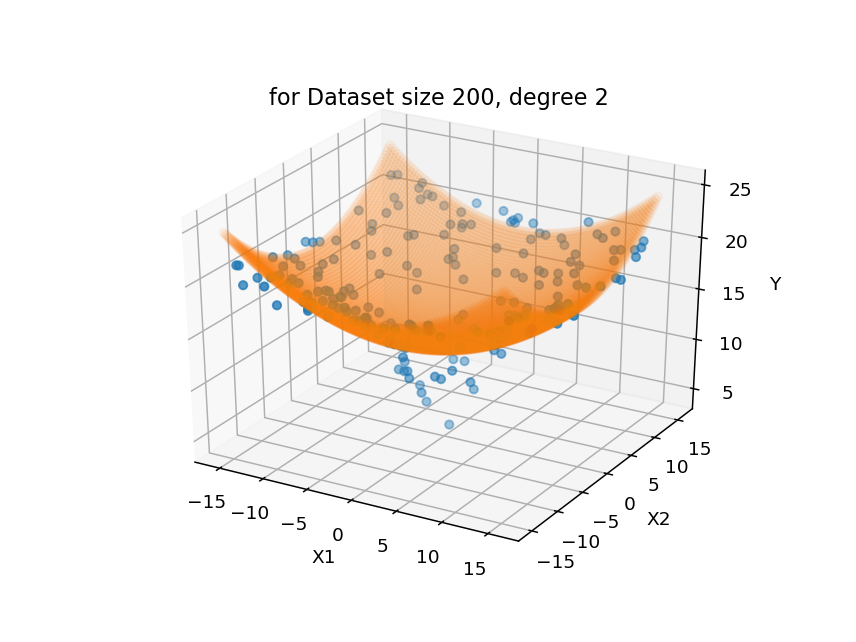

In [418]:
fig = plt.figure()

# For W2
ax = fig.add_subplot(111, projection = '3d')

ax.set_title('for Dataset size 200, degree 2')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")

ax.scatter(X1, X2, Y) # actual data points 

ax.scatter(newX1, newX2, z2, alpha = 0.05)


<IPython.core.display.Javascript object>


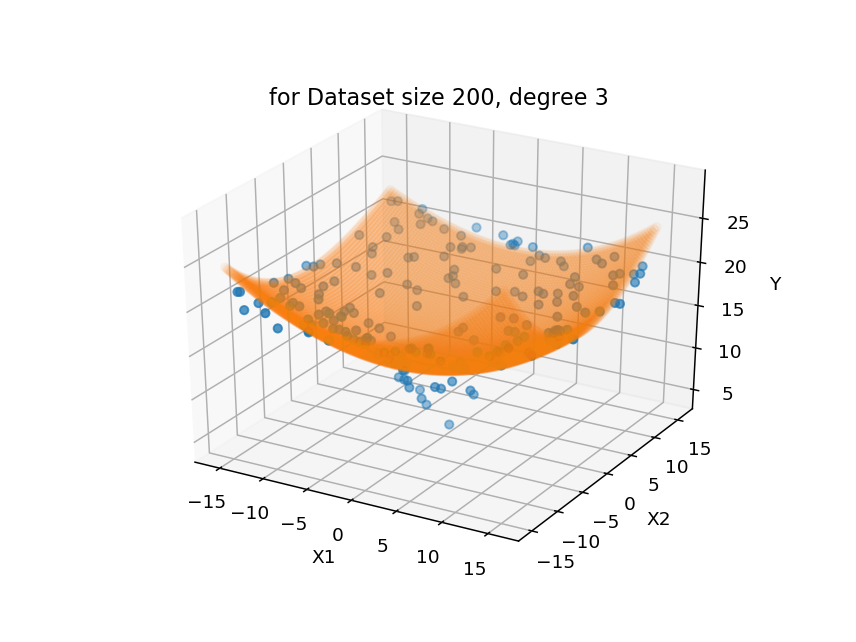

In [419]:
fig = plt.figure()
ax3 = fig.add_subplot(111, projection = '3d')

ax3.set_title('for Dataset size 200, degree 3')
ax3.set_xlabel("X1")
ax3.set_ylabel("X2")
ax3.set_zlabel("Y")

ax3.scatter(X1, X2, Y) # actual data points 
ax3.scatter(newX1, newX2, z3, alpha = 0.05)

<IPython.core.display.Javascript object>


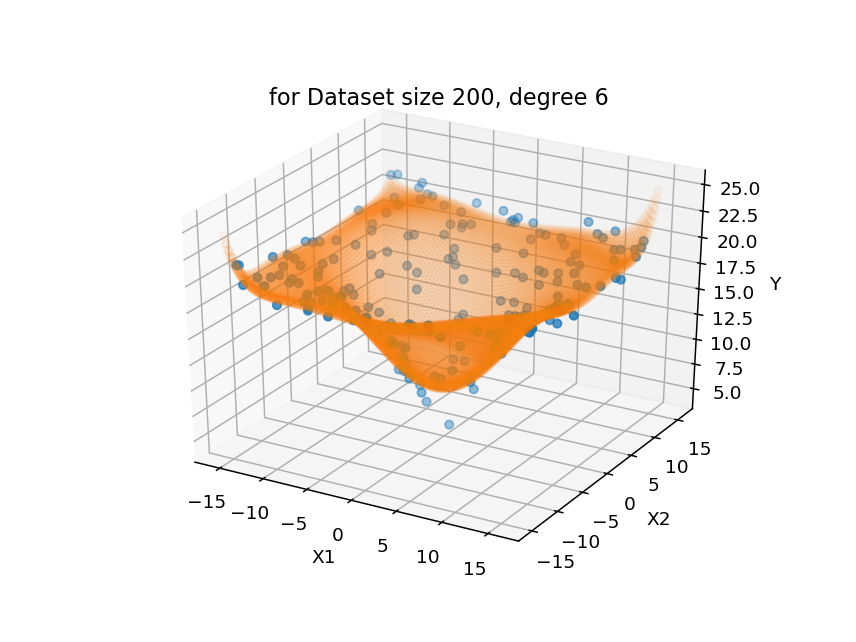

In [420]:
fig = plt.figure()
# for W6
ax6 = fig.add_subplot(111, projection = '3d')

ax6.set_title('for Dataset size 200, degree 6')
ax6.set_xlabel("X1")
ax6.set_ylabel("X2")
ax6.set_zlabel("Y")

ax6.scatter(X1, X2, Y) # actual data points 
ax6.scatter(newX1, newX2, z6, alpha = 0.05)

<IPython.core.display.Javascript object>


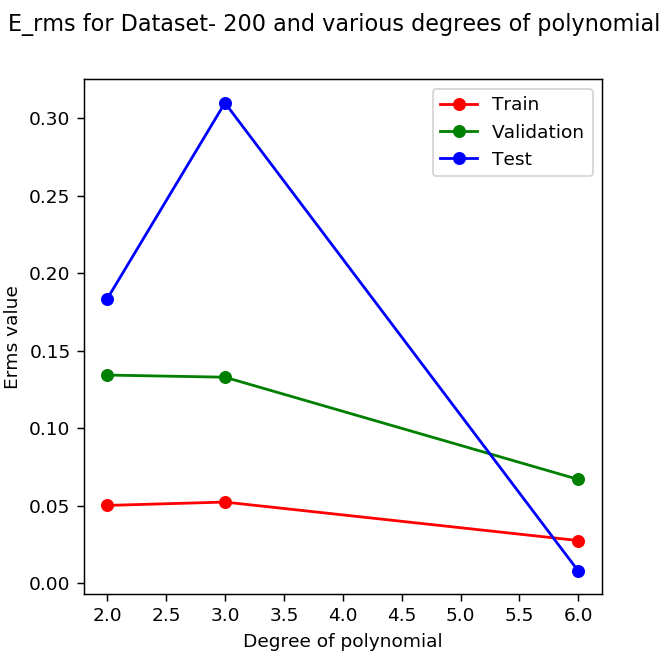

In [421]:
fig = plt.figure(figsize = (5,5))
fig.suptitle('E_rms for Dataset- 200 and various degrees of polynomial')

e_train2, e_val2, e_test2 = e_rms(W2,train,val,test,2)
e_train3, e_val3, e_test3 = e_rms(W3,train,val,test,3)
e_train6, e_val6, e_test6 = e_rms(W6,train,val,test,6)

ax = fig.add_subplot(111)

# print([e_train2,e_train3,e_train6])
ax.plot([2,3,6],[e_train2,e_train3,e_train6],'o-r',label = 'Train')
ax.plot([2,3,6],[e_val2,e_val3,e_val6],'o-g', label = 'Validation')
ax.plot([2,3,6],[e_test2,e_test3,e_test6],'o-b', label = 'Test')
ax.set_xlabel('Degree of polynomial')
ax.set_ylabel('Erms value')

plt.legend()

In [422]:
size = 500
X1, X2, Y = get_sample_data(df,size)

In [423]:
W2 = linear_regress_poly_basis(X1,X2,Y,2)
# f2 = get_feature_mat(x1_axis,x2_axis,2)

W3 = linear_regress_poly_basis(X1,X2,Y,3)
# f3 = get_feature_mat(x1_axis,x2_axis,3)

# W4 = linear_regress_poly_basis(X1,X2,Y,4)
# f4 = get_feature_mat(x1_axis,x2_axis,4)

W6 = linear_regress_poly_basis(X1,X2,Y,6)
# f6 = get_feature_mat(x1_axis,x2_axis,6)

In [424]:
z2 = np.array([predict(x1,x2,W2,2) for x1,x2 in zip(newX1,newX2)])
z3 = np.array([predict(x1,x2,W3,3) for x1,x2 in zip(newX1,newX2)])
z6 = np.array([predict(x1,x2,W6,6) for x1,x2 in zip(newX1,newX2)])

<IPython.core.display.Javascript object>


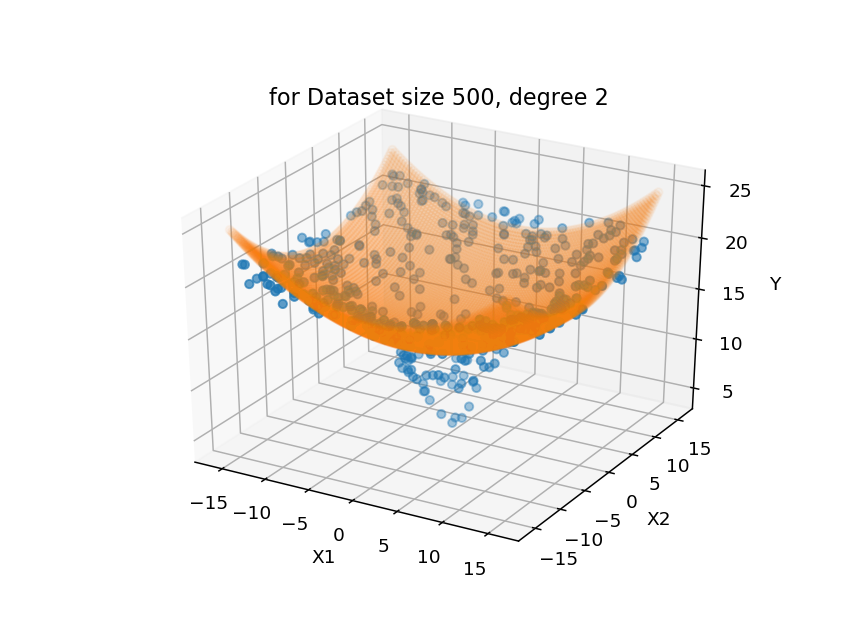

In [425]:
fig = plt.figure()

# For W2
ax = fig.add_subplot(111, projection = '3d')

ax.set_title('for Dataset size 500, degree 2')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")

ax.scatter(X1, X2, Y) # actual data points 

ax.scatter(newX1, newX2, z2, alpha = 0.05)

<IPython.core.display.Javascript object>


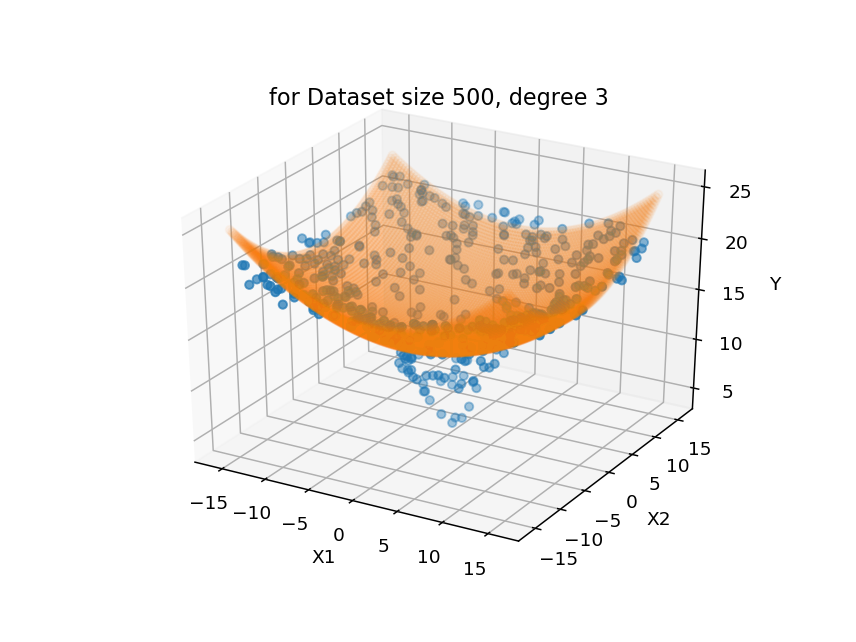

In [426]:
fig = plt.figure()
ax3 = fig.add_subplot(111, projection = '3d')

ax3.set_title('for Dataset size 500, degree 3')
ax3.set_xlabel("X1")
ax3.set_ylabel("X2")
ax3.set_zlabel("Y")

ax3.scatter(X1, X2, Y) # actual data points 
ax3.scatter(newX1, newX2, z3, alpha = 0.05)

<IPython.core.display.Javascript object>


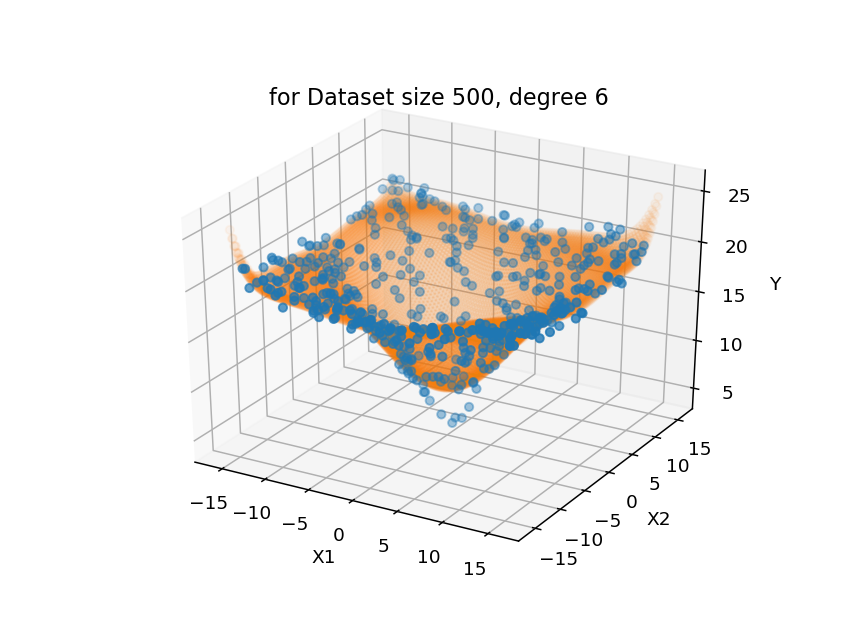

In [427]:
fig = plt.figure()
# for W6
ax6 = fig.add_subplot(111, projection = '3d')

ax6.set_title('for Dataset size 500, degree 6')
ax6.set_xlabel("X1")
ax6.set_ylabel("X2")
ax6.set_zlabel("Y")

ax6.scatter(X1, X2, Y) # actual data points 
ax6.scatter(newX1, newX2, z6, alpha = 0.05)

<IPython.core.display.Javascript object>


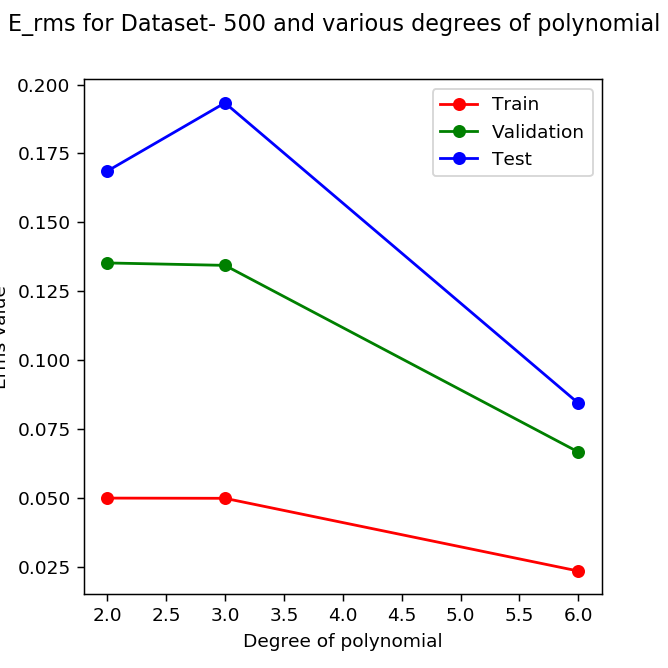

In [428]:
fig = plt.figure(figsize = (5,5))
fig.suptitle('E_rms for Dataset- 500 and various degrees of polynomial')
e_train2, e_val2, e_test2 = e_rms(w2,train,val,test,2)
e_train3, e_val3, e_test3 = e_rms(w3,train,val,test,3)
e_train6, e_val6, e_test6 = e_rms(w6,train,val,test,6)

ax = fig.add_subplot(111)

# print([e_train2,e_train3,e_train6])
ax.plot([2,3,6],[e_train2,e_train3,e_train6],'o-r',label = 'Train')
ax.plot([2,3,6],[e_val2,e_val3,e_val6],'o-g', label = 'Validation')
ax.plot([2,3,6],[e_test2,e_test3,e_test6],'o-b', label = 'Test')
ax.set_xlabel('Degree of polynomial')
ax.set_ylabel('Erms value')

plt.legend()

In [429]:
# fig = plt.figure()
# ax2 = fig.add_subplot(111, projection = '3d')

# ax2.set_title('for W8')
# ax2.set_xlabel("X1")
# ax2.set_ylabel("X2")
# ax2.set_zlabel("Y")
# ax2.set_zlim(0,25)
# ax2.scatter(X1, X2, Y) # actual data points 


# l = np.exp(3)
# reguW8 = linear_regress_poly_basis_with_regu(X1,X2,Y,8,l)


# newX1 = []
# for x1 in x1_axis:
#     newX1 = newX1 + [x1]*100

# newX1 = np.array(newX1)
# l = list(x2_axis)
# newX2 = np.array(l*100)
# # print(.shape)

# # predicted values from learned model 
# z8 = np.array([predict(x1,x2,reguW8,8) for x1,x2 in zip(newX1,newX2)])


# ax2.scatter(newX1, newX2, z8, alpha = 0.05)
# plt.show()


In [430]:
# we need to add the subplots for degree (2, 3, 6)

# for the dataset sizes - (50, 200, 500)

In [431]:
def plot_predict_v_actual(weight,X1,X2,Y,deg, regu = False):
    
    T =  np.array([predict(a,b,weight,deg) for a,b in zip(X1,X2)])
    f = plt.figure()
    a = f.add_subplot()
    title = f'Predicted v Actual values for degree - {deg} ' + 'with regularisation' if regu else f'Predicted v Actual values for degree - {deg} ' + 'without regularisation'
    f.suptitle(title)
    a.scatter(T,Y)
    a.set_xlabel('Tn')
    a.set_ylabel('y(x,w)')
    m = np.linspace(3,22,100)

    a.plot(m,m,'r-')

    plt.show()

In [432]:
# T6 = np.array([predict(a,b,W6,6) for a,b in zip(X1,X2)])
# # print(len(T6))

# f = plt.figure()
# a = f.add_subplot()
# a.scatter(T6,Y)
# a.set_xlabel('Y')
# a.set_ylabel('Tn')
# m = np.linspace(3,22,100)

# a.plot(m,m,'r-')


# plt.show()

# plot_predict_v_actual(W6,X1,X2,Y,6)

In [433]:
def train_val_test_split(df):
    l = len(df)
    
    train = df[:int(0.7*l)]
    val = df[int(0.7*l):int(0.9*l)]
    test  = df[int(0.9*l):]
    
    return train, val, test

In [434]:
# train, val, test = train_val_test_split(df)
# train

In [435]:
# x1_train,x2_train,y_train = map(np.array,[train.x1, train.x2, train.y])

In [436]:
# x1_train

In [437]:
SIZE = [50, 200, 500]
DEGREE = [2,3,6]
LAMBDA = [0, 10**-5, 1, 10]

In [438]:
#STARTING FOR DATASET SIZE 50


In [439]:
train, val, test = train_val_test_split(df)

In [440]:
x1_train,x2_train,y_train = map(np.array,[train.x1, train.x2, train.y])

<IPython.core.display.Javascript object>


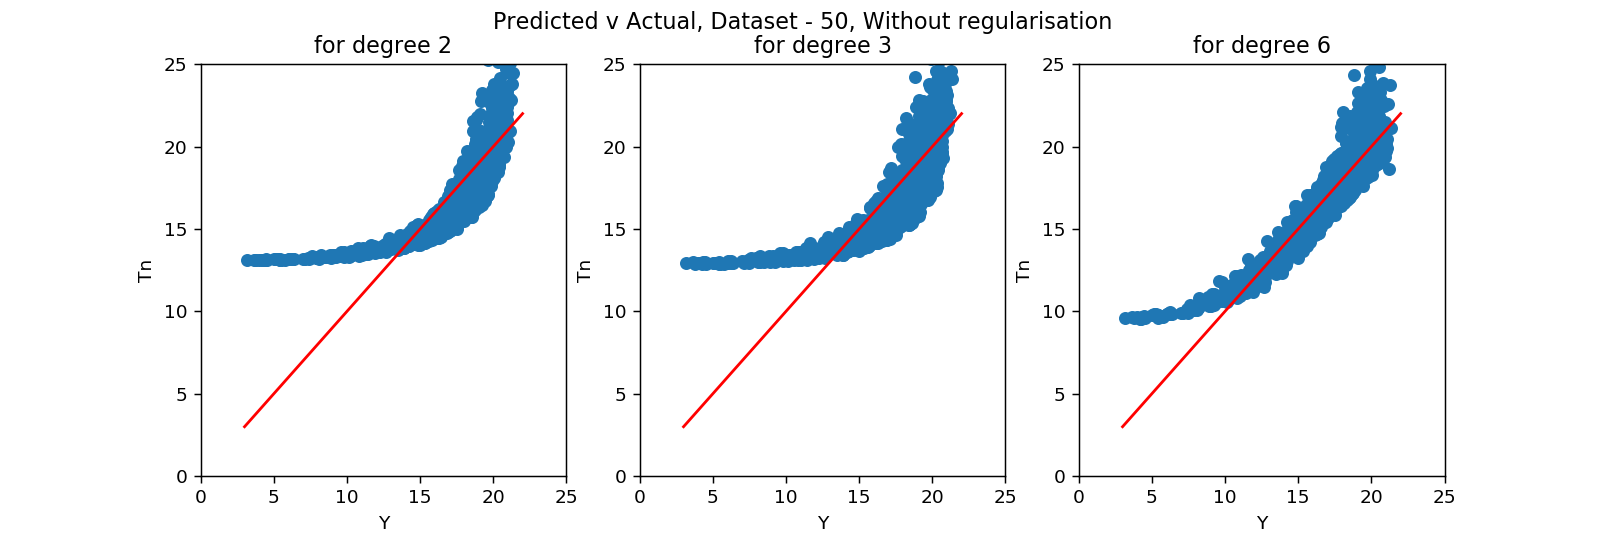

In [441]:
# Without Regularisation

size = 50
#     looping through sizes
    
x1, x2, y = get_sample_data(train,size)

#     weight = {}

#   looping through degree    
w2 = linear_regress_poly_basis(x1,x2,y,2)
w3 = linear_regress_poly_basis(x1,x2,y,3)
w6 = linear_regress_poly_basis(x1,x2,y,6)

#plotting predicted v actual output:

f = plt.figure(figsize = (12,4))
f.suptitle(f'Predicted v Actual, Dataset - {size}, Without regularisation')
t2 = np.array([predict(a,b,w2,2) for a,b in zip(x1_train,x2_train)])
t3 = np.array([predict(a,b,w3,3) for a,b in zip(x1_train,x2_train)])
t6 = np.array([predict(a,b,w6,6) for a,b in zip(x1_train,x2_train)])

#   for degree-2
ax2 = f.add_subplot(131)
ax2.scatter(y_train,t2)
ax2.set_xlim([0,25])
ax2.set_ylim([0,25])
ax2.set_xlabel('Y')
ax2.set_ylabel('Tn')
m = np.linspace(3,22,100)
ax2.plot(m,m,'r-')
ax2.set_title('for degree 2')

#   for degree-3
ax3 = f.add_subplot(132)
ax3.scatter(y_train,t3)
ax3.set_xlim([0,25])
ax3.set_ylim([0,25])
ax3.set_xlabel('Y')
ax3.set_ylabel('Tn')
m = np.linspace(3,22,100)
ax3.plot(m,m,'r-')
ax3.set_title('for degree 3')

#   for degree-2
ax6 = f.add_subplot(133)
ax6.scatter(y_train,t6)
ax6.set_xlim([0,25])
ax6.set_ylim([0,25])
ax6.set_xlabel('Y')
ax6.set_ylabel('Tn')
m = np.linspace(3,22,100)
ax6.plot(m,m,'r-')
ax6.set_title('for degree 6')

f.show()
    
    


<IPython.core.display.Javascript object>


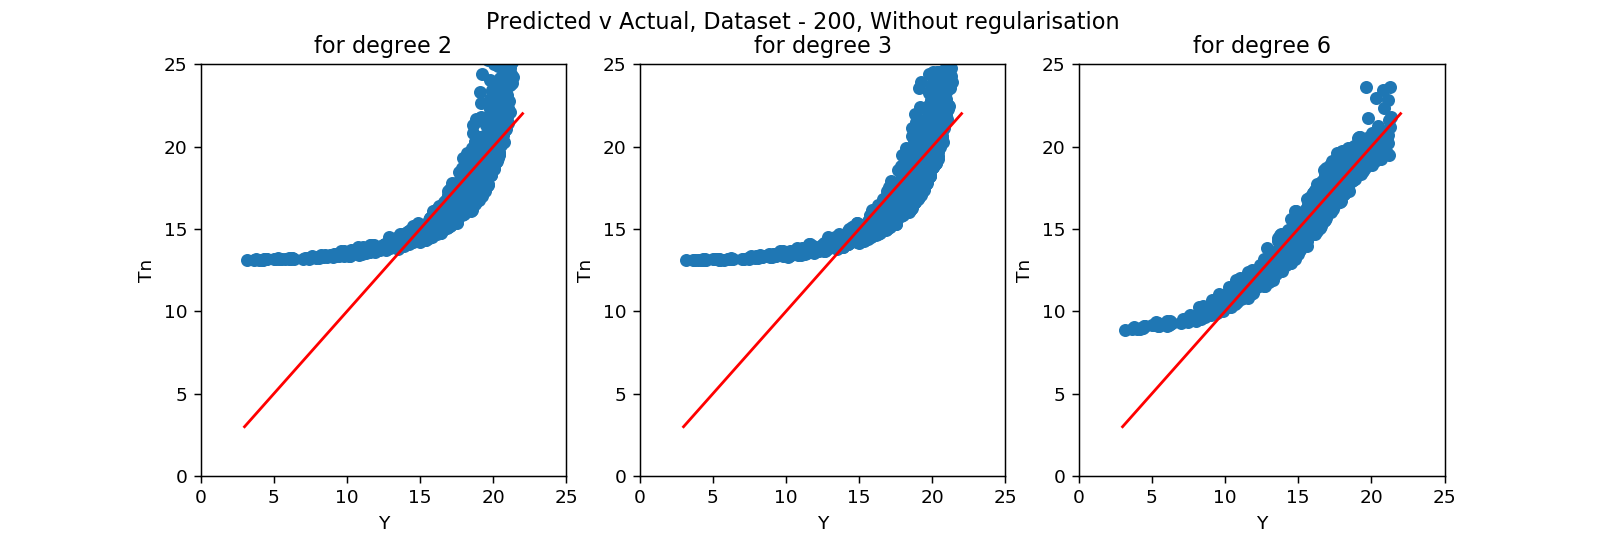

In [442]:
# Without Regularisation

size = 200
#     looping through sizes
    
x1, x2, y = get_sample_data(train,size)

#     weight = {}

#   looping through degree    
w2 = linear_regress_poly_basis(x1,x2,y,2)
w3 = linear_regress_poly_basis(x1,x2,y,3)
w6 = linear_regress_poly_basis(x1,x2,y,6)

#plotting predicted v actual output:

f = plt.figure(figsize = (12,4))
f.suptitle(f'Predicted v Actual, Dataset - {size}, Without regularisation')
t2 = np.array([predict(a,b,w2,2) for a,b in zip(x1_train,x2_train)])
t3 = np.array([predict(a,b,w3,3) for a,b in zip(x1_train,x2_train)])
t6 = np.array([predict(a,b,w6,6) for a,b in zip(x1_train,x2_train)])

#   for degree-2
ax2 = f.add_subplot(131)
ax2.scatter(y_train,t2)
ax2.set_xlim([0,25])
ax2.set_ylim([0,25])
ax2.set_xlabel('Y')
ax2.set_ylabel('Tn')
m = np.linspace(3,22,100)
ax2.plot(m,m,'r-')
ax2.set_title('for degree 2')

#   for degree-3
ax3 = f.add_subplot(132)
ax3.scatter(y_train,t3)
ax3.set_xlim([0,25])
ax3.set_ylim([0,25])
ax3.set_xlabel('Y')
ax3.set_ylabel('Tn')
m = np.linspace(3,22,100)
ax3.plot(m,m,'r-')
ax3.set_title('for degree 3')

#   for degree-2
ax6 = f.add_subplot(133)
ax6.scatter(y_train,t6)
ax6.set_xlim([0,25])
ax6.set_ylim([0,25])
ax6.set_xlabel('Y')
ax6.set_ylabel('Tn')
m = np.linspace(3,22,100)
ax6.plot(m,m,'r-')
ax6.set_title('for degree 6')

plt.show()
    

<IPython.core.display.Javascript object>


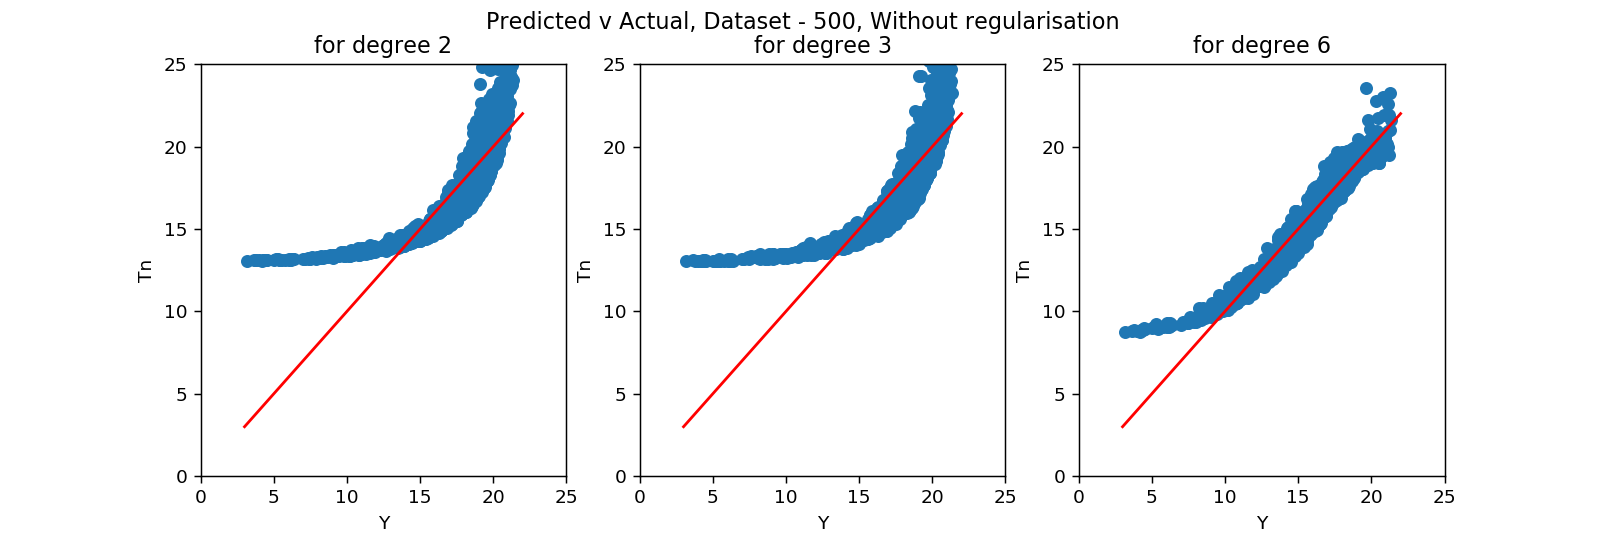

In [443]:
# Without Regularisation

size = 500
#     looping through sizes
    
x1, x2, y = get_sample_data(train,size)

#     weight = {}

#   looping through degree    
w2 = linear_regress_poly_basis(x1,x2,y,2)
w3 = linear_regress_poly_basis(x1,x2,y,3)
w6 = linear_regress_poly_basis(x1,x2,y,6)

#plotting predicted v actual output:

f = plt.figure(figsize = (12,4))
f.suptitle(f'Predicted v Actual, Dataset - {size}, Without regularisation')
t2 = np.array([predict(a,b,w2,2) for a,b in zip(x1_train,x2_train)])
t3 = np.array([predict(a,b,w3,3) for a,b in zip(x1_train,x2_train)])
t6 = np.array([predict(a,b,w6,6) for a,b in zip(x1_train,x2_train)])

#   for degree-2
ax2 = f.add_subplot(131)
ax2.scatter(y_train,t2)
ax2.set_xlim([0,25])
ax2.set_ylim([0,25])
ax2.set_xlabel('Y')
ax2.set_ylabel('Tn')
m = np.linspace(3,22,100)
ax2.plot(m,m,'r-')
ax2.set_title('for degree 2')

#   for degree-3
ax3 = f.add_subplot(132)
ax3.scatter(y_train,t3)
ax3.set_xlim([0,25])
ax3.set_ylim([0,25])
ax3.set_xlabel('Y')
ax3.set_ylabel('Tn')
m = np.linspace(3,22,100)
ax3.plot(m,m,'r-')
ax3.set_title('for degree 3')

#   for degree-2
ax6 = f.add_subplot(133)
ax6.scatter(y_train,t6)
ax6.set_xlim([0,25])
ax6.set_ylim([0,25])
ax6.set_xlabel('Y')
ax6.set_ylabel('Tn')
m = np.linspace(3,22,100)
ax6.plot(m,m,'r-')
ax6.set_title('for degree 6')

plt.show()
    